In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 解决matplotlib中文问题
%matplotlib inline
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 导入数据集

In [187]:
# 导入数据
df = pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

age 年龄

sex 性别 1=male,0=female

cp  胸痛类型(4种) 值1:典型心绞痛，值2:非典型心绞痛，值3:非心绞痛，值4:无症状

trestbps 静息血压 

chol 血清胆固醇

fbs 空腹血糖 >120mg/dl ,1=true; 0=false

restecg 静息心电图(值0,1,2)

thalach 达到的最大心率

exang 运动诱发的心绞痛(1=yes;0=no)

oldpeak 相对于休息的运动引起的ST值(ST值与心电图上的位置有关)

slope 运动高峰ST段的坡度 Value 1: upsloping向上倾斜, Value 2: flat持平, Value 3: downsloping向下倾斜

ca  The number of major vessels(血管) (0-3)

thal A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
       一种叫做地中海贫血的血液疾病(3 =正常;6 =固定缺陷;7 =可逆转缺陷)
       
target 生病没有(0=no,1=yes)

# EDA

In [6]:
import pandas_profiling

In [8]:
profile = pandas_profiling.ProfileReport(df)

In [9]:
profile

In [10]:
#将报告导入到html
profile.to_file('profile.html')

# 相关性分析 

In [14]:
##特征相关性分析
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

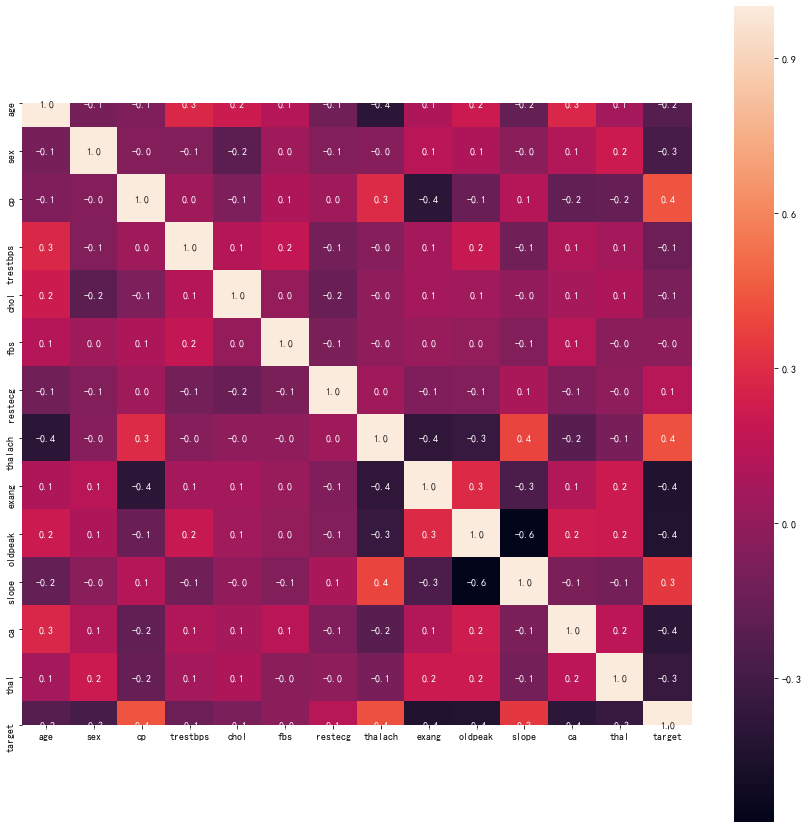

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".1f",square=True)
plt.show()

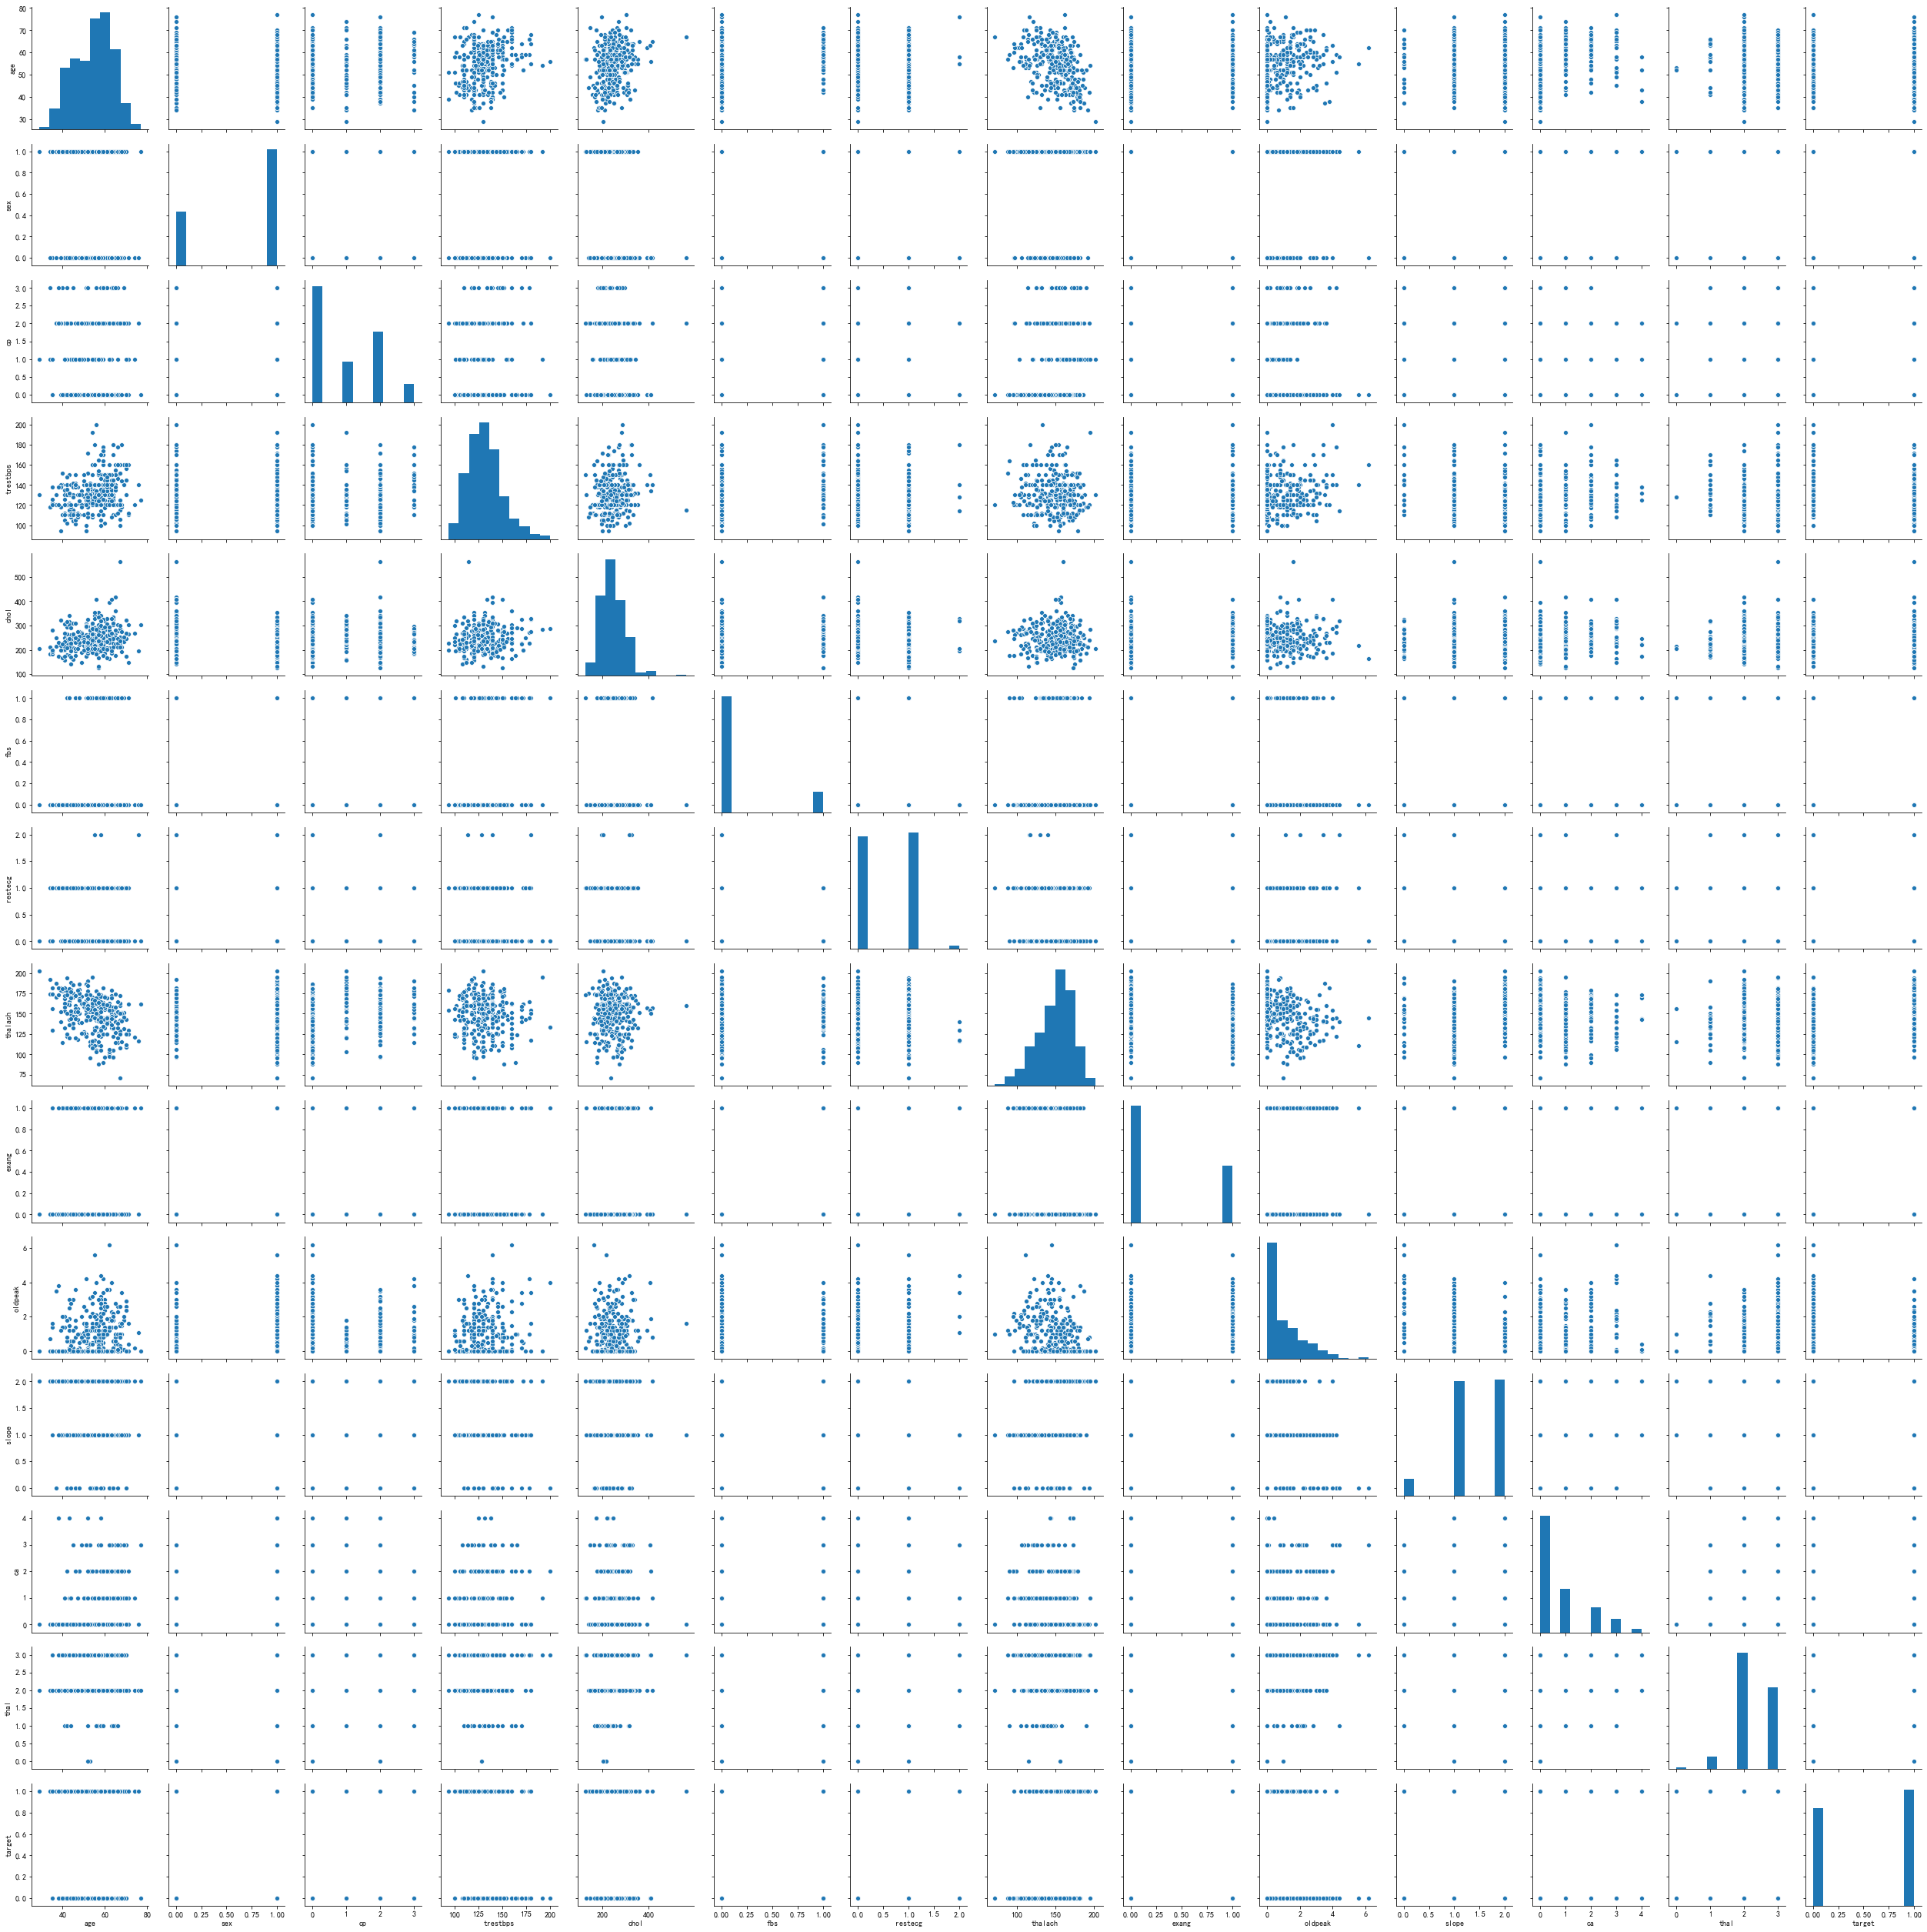

In [8]:
##打印各列之间的散点图
sns.pairplot(df)
plt.show()

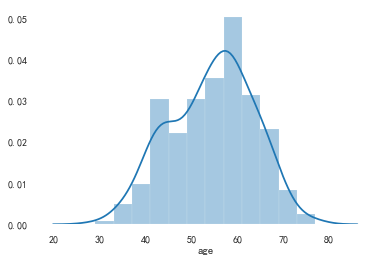

In [15]:
##单个特征统计分布分析
sns.distplot(df['age'])
plt.show()

In [16]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 0, '得病/未得病比例')

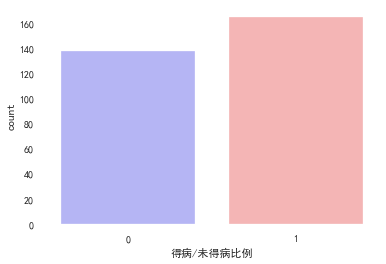

In [17]:
sns.countplot(x='target',data=df,palette='bwr')
plt.xlabel("得病/未得病比例")

In [18]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Text(0.5, 0, 'Sex (0 = 女, 1= 男)')

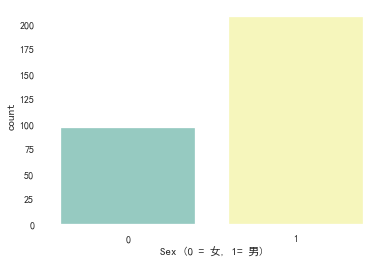

In [19]:
sns.countplot(x='sex',data=df,palette="Set3")
plt.xlabel("Sex (0 = 女, 1= 男)")

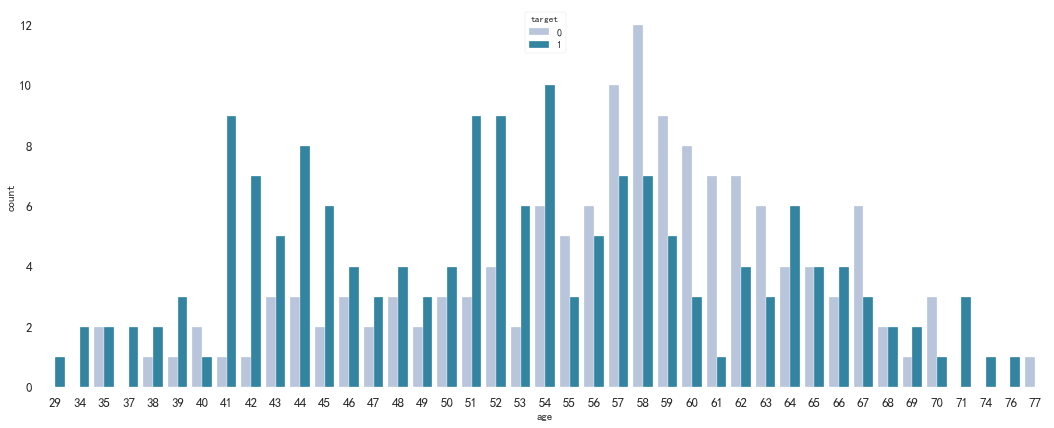

In [20]:
plt.figure(figsize=(18,7))
sns.countplot(x='age',data = df, hue = 'target',palette='PuBuGn',saturation=0.8)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

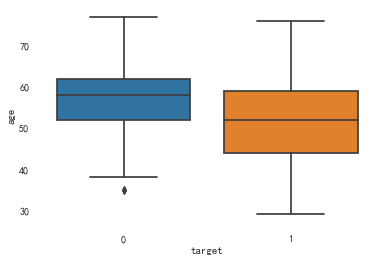

In [21]:
#箱型图
sns.boxplot(x=df["target"],y=df["age"])
plt.show()
#关注最小值，最大值，中位数

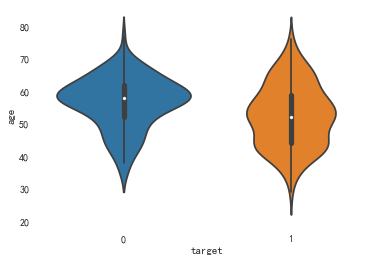

In [22]:
#小提琴图
sns.violinplot(x=df["target"],y=df["age"])
plt.show()

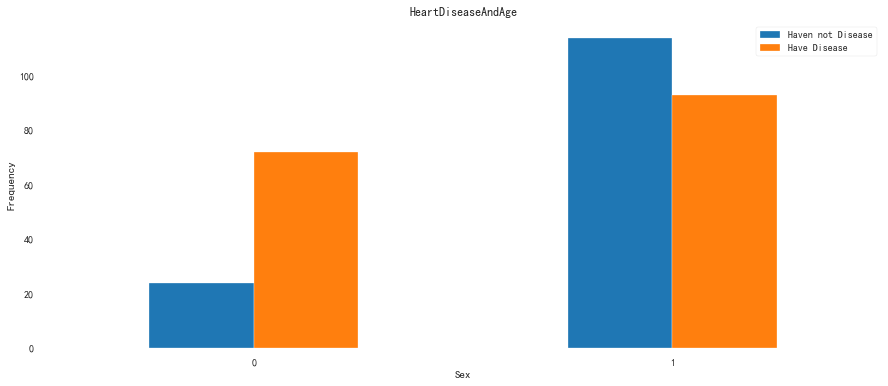

In [191]:
#不同性别，患病与不患病的分布
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.title("HeartDiseaseAndAge")
plt.xlabel("Sex")
plt.xticks(rotation=0)
plt.legend(["Haven not Disease","Have Disease"])
plt.ylabel("Frequency")
plt.show()

In [24]:
#将一些分类数据转化为one-hot encoding
df['sex'][df['sex']==0]='female'
df['sex'][df['sex']==1]='male'
df['cp'][df['cp']==0]='typical angina'
df['cp'][df['cp']==1]='atypical angina'
df['cp'][df['cp']==2]='non-anginal pain'
df['cp'][df['cp']==3]='asymptomatic'

df['fbs'][df['fbs']==0]='lower than 120mg/ml'
df['fbs'][df['fbs']==1]='greater than 120mg/ml'

df['restecg'][df['restecg']==0]='normal'
df['restecg'][df['restecg']==1]='ST-T wave abnormality'
df['restecg'][df['restecg']==2]='left ventricular hypertrophy'

df['exang'][df['exang']==0]='no'
df['exang'][df['exang']==1]='yes'


df['slope'][df['slope']==0]='upsloping'
df['slope'][df['slope']==1]='flat'
df['slope'][df['slope']==2]='downsloping'


df['thal'][df['thal']==0]='unknown'
df['thal'][df['thal']==1]='normal'
df['thal'][df['thal']==2]='fixed defect'
df['thal'][df['thal']==3]='reversable defect'

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCo

In [25]:
df.head()

age     sex                cp  trestbps  chol                    fbs  \
0   63    male      asymptomatic       145   233  greater than 120mg/ml   
1   37    male  non-anginal pain       130   250    lower than 120mg/ml   
2   41  female   atypical angina       130   204    lower than 120mg/ml   
3   56    male   atypical angina       120   236    lower than 120mg/ml   
4   57  female    typical angina       120   354    lower than 120mg/ml   

                 restecg  thalach exang  oldpeak        slope  ca  \
0                 normal      150    no      2.3    upsloping   0   
1  ST-T wave abnormality      187    no      3.5    upsloping   0   
2                 normal      172    no      1.4  downsloping   0   
3  ST-T wave abnormality      178    no      0.8  downsloping   0   
4  ST-T wave abnormality      163   yes      0.6  downsloping   0   

           thal  target  
0        normal       1  
1  fixed defect       1  
2  fixed defect       1  
3  fixed defect       1  
4  fixed defect       1

In [26]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

In [28]:
#使用get_dummies方法将离散的定类和定序特征的列转化成独热编码格式
df=pd.get_dummies(df)
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'sex_female', 'sex_male', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal pain', 'cp_typical angina', 'fbs_greater than 120mg/ml',
       'fbs_lower than 120mg/ml', 'restecg_ST-T wave abnormality',
       'restecg_left ventricular hypertrophy', 'restecg_normal', 'exang_no',
       'exang_yes', 'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect',
       'thal_unknown'],
      dtype='object')

In [29]:
df_copy = df.copy()#将原数据备份

In [30]:
df_copy.head()

age  trestbps  chol  thalach  oldpeak  ca  target  sex_female  sex_male  \
0   63       145   233      150      2.3   0       1           0         1   
1   37       130   250      187      3.5   0       1           0         1   
2   41       130   204      172      1.4   0       1           1         0   
3   56       120   236      178      0.8   0       1           0         1   
4   57       120   354      163      0.6   0       1           1         0   

   cp_asymptomatic  ...  restecg_normal  exang_no  exang_yes  \
0                1  ...               1         1          0   
1                0  ...               0         1          0   
2                0  ...               1         1          0   
3                0  ...               0         1          0   
4                0  ...               0         0          1   

   slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
0                  0           0                1                  0   
1                  0           0                1                  1   
2                  1           0                0                  1   
3                  1           0                0                  1   
4                  1           0                0                  1   

   thal_normal  thal_reversable defect  thal_unknown  
0            1                       0             0  
1            0                       0             0  
2            0                       0             0  
3            0                       0             0  
4            0                       0             0  

[5 rows x 27 columns]

# 随机森林建模

In [31]:
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop('target', axis = 1)

In [43]:
y = df_copy['target']

In [44]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [46]:
train_X.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_female',
       'sex_male', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal pain', 'cp_typical angina', 'fbs_greater than 120mg/ml',
       'fbs_lower than 120mg/ml', 'restecg_ST-T wave abnormality',
       'restecg_left ventricular hypertrophy', 'restecg_normal', 'exang_no',
       'exang_yes', 'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect',
       'thal_unknown'],
      dtype='object')

In [50]:
 train_y

266    0
215    0
99     1
119    1
11     1
      ..
8      1
73     1
118    1
189    0
206    0
Name: target, Length: 242, dtype: int64

In [93]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=5,n_estimators=100,random_state=5)
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [94]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import r2_score
# 打印分类评估指标
def print_metres(true_y, pred_y):
    p, r, f1, _ = precision_recall_fscore_support(true_y, pred_y, average='macro')
    r2 = r2_score(true_y, pred_y)
    print("精确率: %.3f, 召回率: %.3f, F1值: %.3f, R2值：%.3f" % (p, r, f1, r2))
    return p, r, f1, r2

In [95]:
# 训练指标
pred_y = model.predict(train_X)
print_metres(train_y, pred_y)

# 测试指标
pred_y = model.predict(test_X)
print_metres(test_y, pred_y)

精确率: 0.938, 召回率: 0.930, F1值: 0.933, R2值：0.732
精确率: 0.886, 召回率: 0.885, F1值: 0.885, R2值：0.541


(0.8857758620689655,
 0.8849462365591398,
 0.8851224105461394,
 0.5408602150537634)

In [55]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    
    return score

In [56]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [57]:
def fit_model(X, y):
    cross_validator = KFold(10, shuffle=True)
    regressor = RandomForestClassifier()
    params = {'n_estimators':range(10,151,10)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=2,
                                  min_samples_leaf=1,max_depth=5,max_features='sqrt' ,random_state=5),
                         param_grid=params, scoring=scoring_fnc, cv=cross_validator)
    
    # 网格搜索
    grid = grid.fit(X, y)
    return grid.best_estimator_

In [58]:
optimal = fit_model(train_X, train_y)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [59]:
y_pred = optimal.predict(test_X)

In [60]:
r2 = performance_metric(test_y, y_pred)

In [61]:
print('最优模型的参数 n_estimators 是: {} ' .format(optimal.get_params()['n_estimators']))

最优模型的参数 n_estimators 是: 10 


In [62]:
print('最优模型在测试数据上 R^2 分数 {: .2f}' .format(r2))

最优模型在测试数据上 R^2 分数  0.61


In [63]:
def fit_model1(X, y):
    cross_validator = KFold(10, shuffle=True)
    regressor = RandomForestClassifier()
    params = {'max_depth':range(3,14,2), 'min_samples_split':range(3,14,2)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator =  RandomForestClassifier(n_estimators= 10, 
                                  min_samples_leaf=1,max_features='sqrt' ,oob_score=True, random_state=5),
                         param_grid=params, scoring=scoring_fnc, cv=cross_validator)
    
    # 网格搜索
    grid = grid.fit(X, y)
    return grid.best_estimator_

In [65]:
optimal = fit_model1(train_X, train_y)

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-p

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-p

In [69]:
y_pred = optimal.predict(test_X)

In [70]:
r2 = performance_metric(test_y, y_pred)

In [71]:
print('最优模型的参数 min_samples_split 是: {} ' .format(optimal.get_params()['min_samples_split']))

最优模型的参数 min_samples_split 是: 3 


In [72]:
print('最优模型的参数 max_depth 是: {} ' .format(optimal.get_params()['max_depth']))

最优模型的参数 max_depth 是: 11 


In [73]:
print('最优模型在测试数据上 R^2 分数 {: .2f}' .format(r2))

最优模型在测试数据上 R^2 分数  0.61


In [74]:
def fit_model2(X, y):
    cross_validator = KFold(10, shuffle=True)
    regressor = RandomForestClassifier()
    params =  {'min_samples_split':range(3,14,2), 'min_samples_leaf':range(1,20)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator =  RandomForestClassifier(n_estimators= 10, max_depth=11,
                                  max_features='sqrt' ,oob_score=True, random_state=5),
                         param_grid=params, scoring=scoring_fnc, cv=cross_validator)
    
    # 网格搜索
    grid = grid.fit(X, y)
    return grid.best_estimator_

In [75]:
optimal = fit_model2(train_X, train_y)

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-p

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-p

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-p

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-p

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-p

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-p

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-p

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-p

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-p

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

In [76]:
y_pred = optimal.predict(test_X)

In [77]:
r2 = performance_metric(test_y, y_pred)

In [78]:
print('最优模型的参数 min_samples_split 是: {} ' .format(optimal.get_params()['min_samples_split']))

最优模型的参数 min_samples_split 是: 3 


In [79]:
print('最优模型的参数 min_samples_leaf 是: {} ' .format(optimal.get_params()['min_samples_leaf']))

最优模型的参数 min_samples_leaf 是: 7 


In [80]:
print('最优模型在测试数据上 R^2 分数 {: .2f}' .format(r2))

最优模型在测试数据上 R^2 分数  0.61


In [81]:
def fit_model3(X, y):
    cross_validator = KFold(10, shuffle=True)
    regressor = RandomForestClassifier()
    params =  {'max_features':range(3,11,1)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator =  RandomForestClassifier(n_estimators= 10, max_depth=11, min_samples_split=3,
                                  min_samples_leaf=7 ,oob_score=True, random_state=5),
                         param_grid=params, scoring=scoring_fnc, cv=cross_validator)
    
    # 网格搜索
    grid = grid.fit(X, y)
    return grid.best_estimator_

In [82]:
optimal = fit_model3(train_X, train_y)

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-p

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

In [83]:
y_pred = optimal.predict(test_X)

In [84]:
r2 = performance_metric(test_y, y_pred)

In [85]:
print('最优模型的参数 max_features 是: {} ' .format(optimal.get_params()['max_features']))

最优模型的参数 max_features 是: 8 


In [86]:
print('最优模型在测试数据上 R^2 分数 {: .2f}' .format(r2))

最优模型在测试数据上 R^2 分数  0.48


In [101]:
#最佳模型
model4=RandomForestClassifier( max_depth=5, max_features='sqrt',
                       min_samples_leaf=1, min_samples_split=2,
                        n_estimators=10, random_state = 5, oob_score=True)
model4.fit(train_X,train_y)

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=5, verbose=0,
                       warm_start=False)

In [103]:
# 最佳模型的训练指标
pred_y = model4.predict(train_X)
print_metres(train_y, pred_y)

# 最佳模型的测试指标
pred_y = model4.predict(test_X)
print_metres(test_y, pred_y)

精确率: 0.931, 召回率: 0.927, F1值: 0.929, R2值：0.716
精确率: 0.902, 召回率: 0.902, F1值: 0.902, R2值：0.606


(0.9016129032258065,
 0.9016129032258065,
 0.9016129032258065,
 0.6064516129032258)

In [104]:
len(model4.estimators_)

10

In [105]:
#找到索引为3的决策树
estimator = model4.estimators_[3]
estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1423042237, splitter='best')

In [123]:
#将特征值转化为字符串
feature_names = train_X.columns


In [122]:
train_y_str = train_y.astype('str')
train_y_str[train_y_str == '0'] = 'no disease'
train_y_str[train_y_str == '1'] = 'disease'
train_y_str = train_y_str.values

In [117]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
export_graphviz(estimator,out_file='tree.dot',
                feature_names=feature_names,
               class_names=train_y_str,
                rounded=True,proportion=True,
                label='root',precision=2,filled=True
               )
from subprocess import call
call(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi=600'])
from IPython.display import Image
Image(filename='tree.png')
#橙色患病，蓝色不患病
#第一行是指标/特征
#第二行是基尼指数
#第三行是数据的比例
#第四行：患病和不患病的比例
#越往下分，基尼指数越接近于0

In [124]:
import eli5
eli5.show_weights(estimator, feature_names=feature_names.to_list())

In [126]:
#特征排序
print("重要性特征排序")
feature_names=test_X.columns
feature_importances=model.feature_importances_
indices=np.argsort(feature_importances)[::-1]
# print(indices)
for index in indices:
    print("feature %s (%f)"%(feature_names[index],feature_importances[index]))

重要性特征排序
feature ca (0.115223)
feature thal_fixed defect (0.113785)
feature cp_typical angina (0.106293)
feature oldpeak (0.090147)
feature thalach (0.085871)
feature thal_reversable defect (0.069922)
feature exang_yes (0.052044)
feature age (0.050104)
feature chol (0.047142)
feature trestbps (0.045093)
feature slope_downsloping (0.039228)
feature exang_no (0.032542)
feature slope_flat (0.026342)
feature sex_male (0.024862)
feature sex_female (0.019857)
feature cp_non-anginal pain (0.017827)
feature cp_asymptomatic (0.013508)
feature restecg_normal (0.011109)
feature restecg_ST-T wave abnormality (0.010026)
feature fbs_greater than 120mg/ml (0.006396)
feature thal_normal (0.006350)
feature cp_atypical angina (0.006234)
feature fbs_lower than 120mg/ml (0.004978)
feature slope_upsloping (0.003571)
feature thal_unknown (0.000980)
feature restecg_left ventricular hypertrophy (0.000564)


# 模型预测

In [131]:
#模型预测
pred_y = model4.predict(test_X)
pred_y

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [139]:
pred_proba_y = model4.predict_proba(test_X)
pred_proba_y

array([[0.34683057, 0.65316943],
       [0.94905372, 0.05094628],
       [0.97776493, 0.02223507],
       [0.7909127 , 0.2090873 ],
       [0.3886541 , 0.6113459 ],
       [0.81666667, 0.18333333],
       [0.34071558, 0.65928442],
       [0.88333333, 0.11666667],
       [0.08572092, 0.91427908],
       [0.28810401, 0.71189599],
       [0.22489165, 0.77510835],
       [0.88174603, 0.11825397],
       [0.25134211, 0.74865789],
       [0.02086195, 0.97913805],
       [0.32917722, 0.67082278],
       [0.62172097, 0.37827903],
       [0.61535068, 0.38464932],
       [0.52634211, 0.47365789],
       [0.16384211, 0.83615789],
       [0.9984127 , 0.0015873 ],
       [0.98174603, 0.01825397],
       [0.78030303, 0.21969697],
       [0.14867013, 0.85132987],
       [0.9984127 , 0.0015873 ],
       [0.58694965, 0.41305035],
       [0.09604167, 0.90395833],
       [0.30220588, 0.69779412],
       [0.04752861, 0.95247139],
       [0.20495169, 0.79504831],
       [0.9984127 , 0.0015873 ],
       [0.

In [142]:
#患病的概率
pred_disease_y = model4.predict_proba(test_X)[:,1]

In [141]:
#混淆矩阵模块
from sklearn.metrics import confusion_matrix
confusion_matrix_model = confusion_matrix(test_y,pred_y)
confusion_matrix_model

array([[27,  3],
       [ 3, 28]], dtype=int64)

In [184]:
import itertools
def cnf_matrix_plotter(cm,description, classes):
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Oranges)
    plt.title(description, y = 1.1,fontsize=16)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    threshold=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j] > threshold else "black",fontsize=25)
        
    plt.tight_layout()
    plt.ylabel('实际值',fontsize=12)
    plt.xlabel('预测值',fontsize=12)
    plt.show()

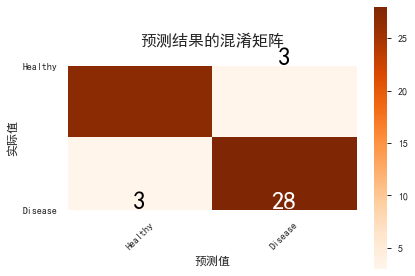

In [185]:
cnf_matrix_plotter(confusion_matrix_model,'预测结果的混淆矩阵',["Healthy",'Disease'])

In [138]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_y,target_names=["Healthy","Disease"]))

              precision    recall  f1-score   support

     Healthy       0.90      0.90      0.90        30
     Disease       0.90      0.90      0.90        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [143]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(test_y,pred_disease_y)

In [144]:
fpr

array([0.        , 0.        , 0.        , 0.03333333, 0.03333333,
       0.06666667, 0.06666667, 0.1       , 0.1       , 0.16666667,
       0.16666667, 0.36666667, 0.36666667, 0.63333333, 0.7       ,
       0.8       , 0.86666667, 1.        ])

In [145]:
tpr

array([0.        , 0.03225806, 0.41935484, 0.41935484, 0.70967742,
       0.70967742, 0.77419355, 0.77419355, 0.93548387, 0.93548387,
       0.96774194, 0.96774194, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [146]:
thresholds

array([1.97913805e+00, 9.79138053e-01, 7.95048309e-01, 7.83159420e-01,
       6.91453889e-01, 6.70822784e-01, 6.55998168e-01, 6.53169429e-01,
       4.82261247e-01, 4.42523810e-01, 4.13050348e-01, 3.19049964e-01,
       2.78021978e-01, 1.16666667e-01, 1.01587302e-01, 2.22350749e-02,
       1.82539683e-02, 1.58730159e-03])

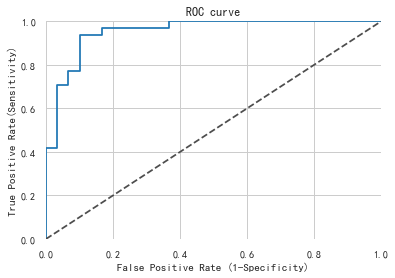

In [147]:
#ROC可视化
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],ls="--",c=".3")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams["font.size"]=12
plt.title("ROC curve")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate(Sensitivity)")
plt.grid(True)

In [148]:
auc(fpr,tpr)

0.9526881720430108

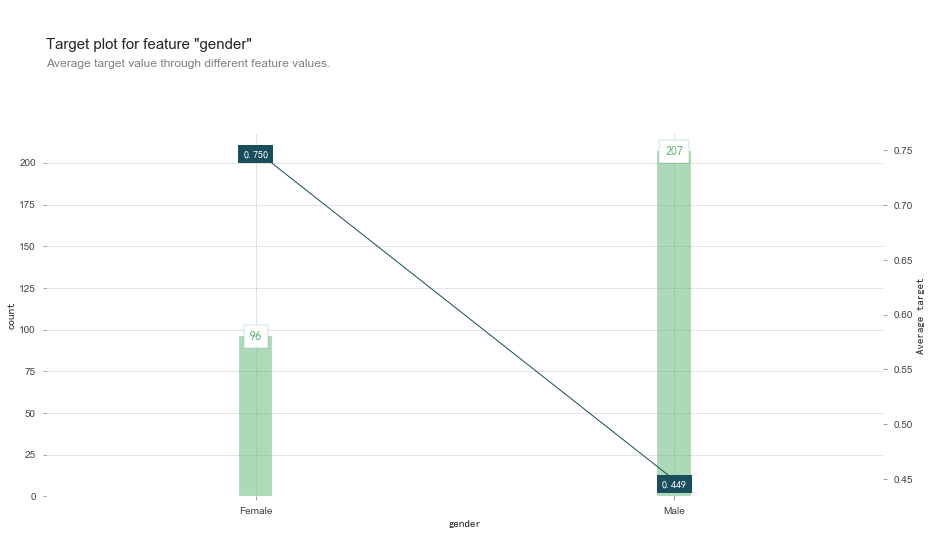

In [163]:
fig,axes,summary_df=info_plots.target_plot(df=df_copy,feature='sex_male',feature_name='gender',target=['target'])
#在为建模之前女性患心脏病的概率为0.75而男性为0.449这个是由数据直接计算出的

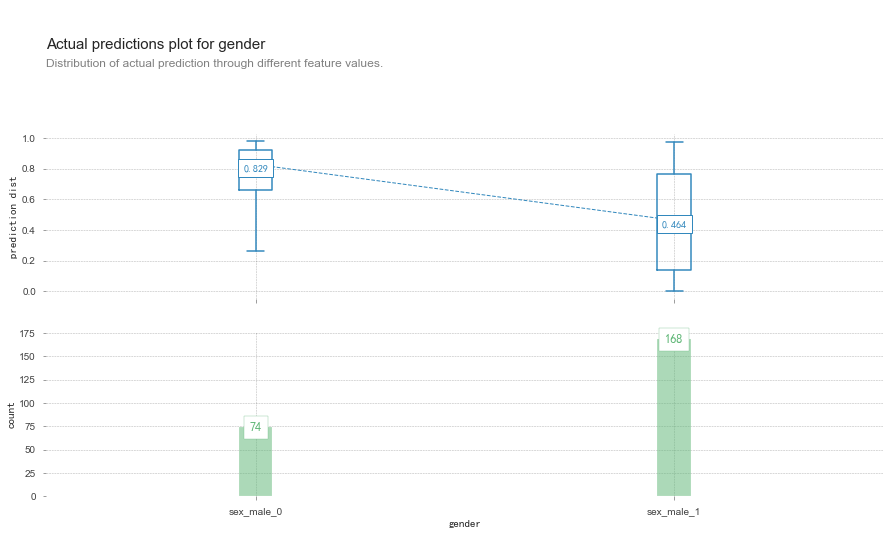

In [164]:
from pdpbox import info_plots,get_dataset,pdp,get_dataset
fig,axes,summary_df=info_plots.actual_plot(model=model4,X=train_X,feature='sex_male',feature_name='gender',predict_kwds={})
#加入模型之后使得得出的结果更加可靠女性患心脏病的概率来看高达0.829，而男性为0.464
#可以得出结论男性比女性患病概率低

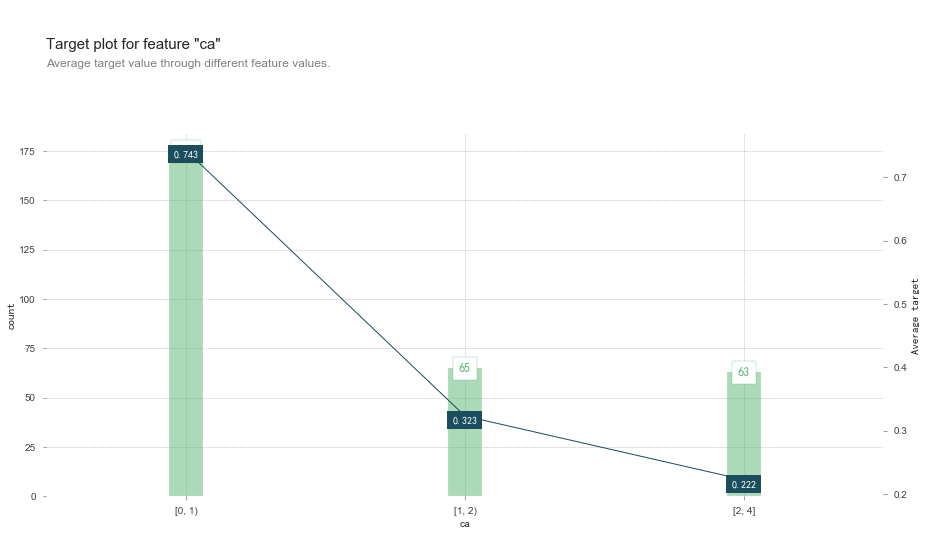

In [157]:
fig,axes,summary_df=info_plots.target_plot(df=df_copy,feature='ca',feature_name='ca',target=['target'])

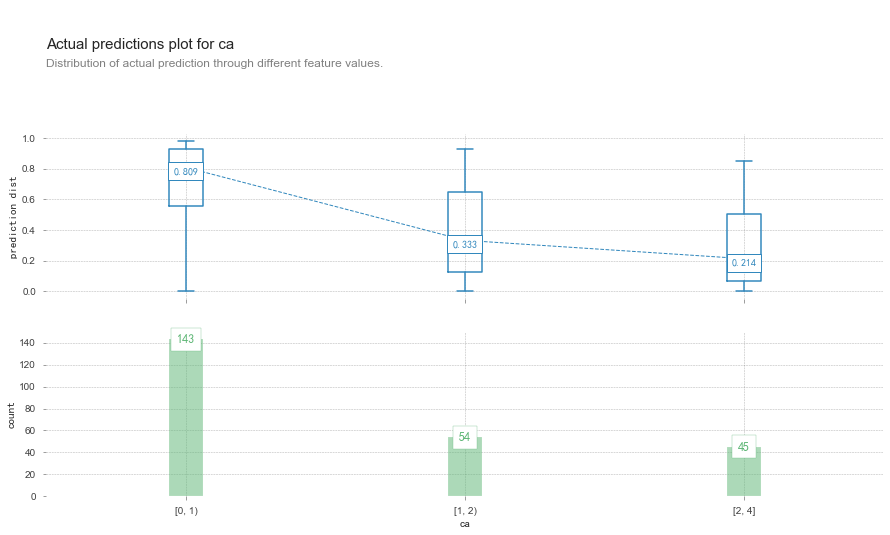

In [165]:
fig,axes,summary_df=info_plots.actual_plot(model=model4,X=train_X,feature='ca',feature_name='ca',predict_kwds={})
#由模型可得出结论大血管数越多，患病概率越低

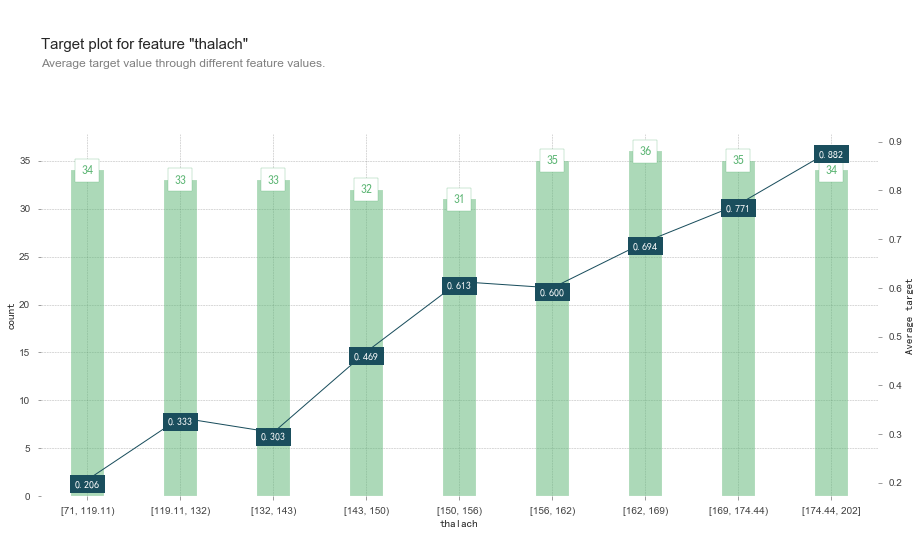

In [166]:
fig,axes,summary_df=info_plots.target_plot(df=df_copy,feature='thalach',feature_name='thalach',target=['target'])

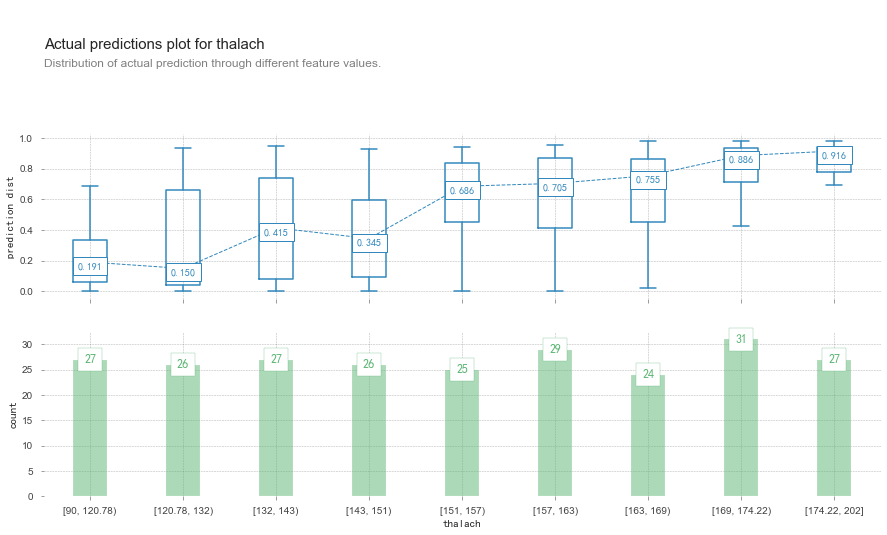

In [171]:
fig,axes,summary_df=info_plots.actual_plot(model=model4,X=train_X,feature='thalach',feature_name='thalach',predict_kwds={})
#在大体来看模型预测的心率越高患病概率也就越高

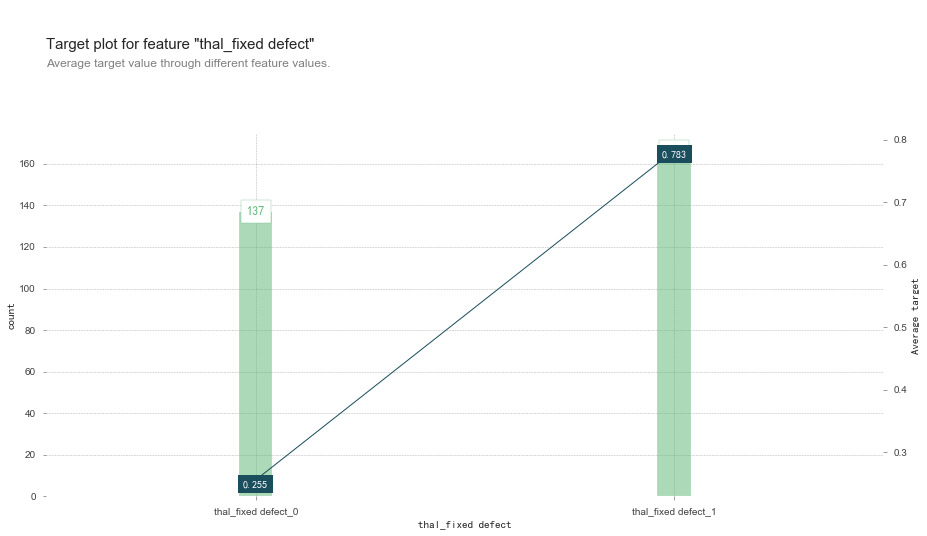

In [167]:
##先验概率统计
fig,axes,summary_df=info_plots.target_plot(df=df,feature='thal_fixed defect',feature_name='thal_fixed defect',target=['target'])

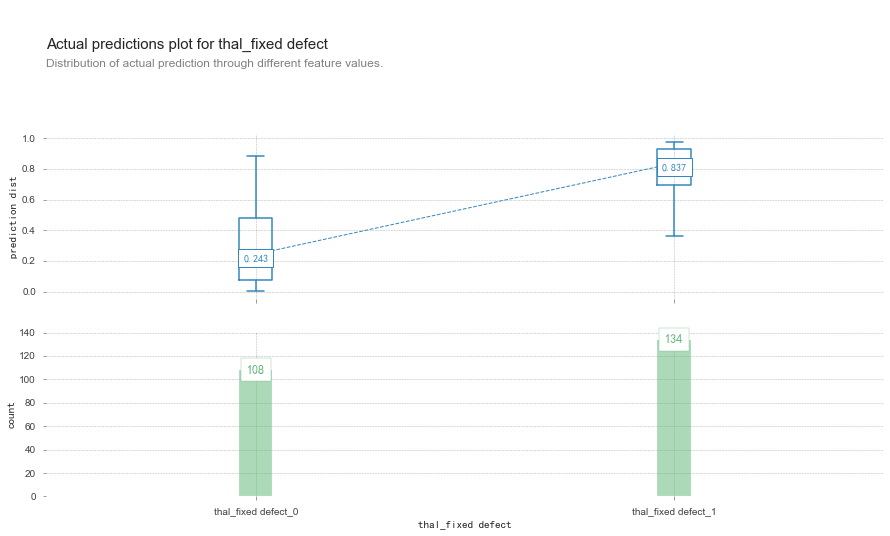

In [168]:
fig,axes,summary_df=info_plots.actual_plot(model=model4,X=train_X,feature='thal_fixed defect',feature_name='thal_fixed defect',predict_kwds={})
#模型预测的有地中海贫血的患者并且具有固定缺陷的人患病概率会高

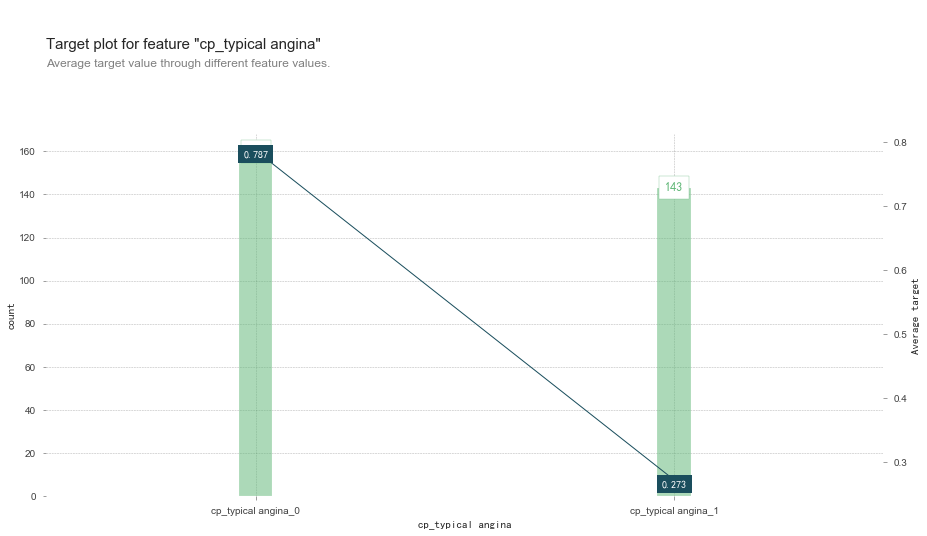

In [169]:
##先验概率统计
fig,axes,summary_df=info_plots.target_plot(df=df,feature='cp_typical angina',feature_name='cp_typical angina',target=['target'])

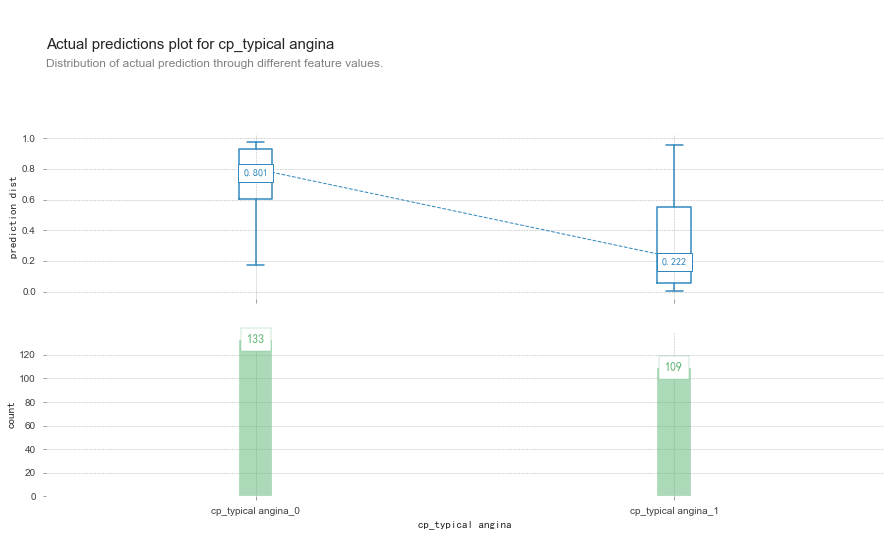

In [170]:
fig,axes,summary_df=info_plots.actual_plot(model=model4,X=train_X,feature='cp_typical angina',feature_name='cp_typical angina',predict_kwds={})
#模型预测无典型心绞痛的人患病概率会低于有典型心绞痛的人

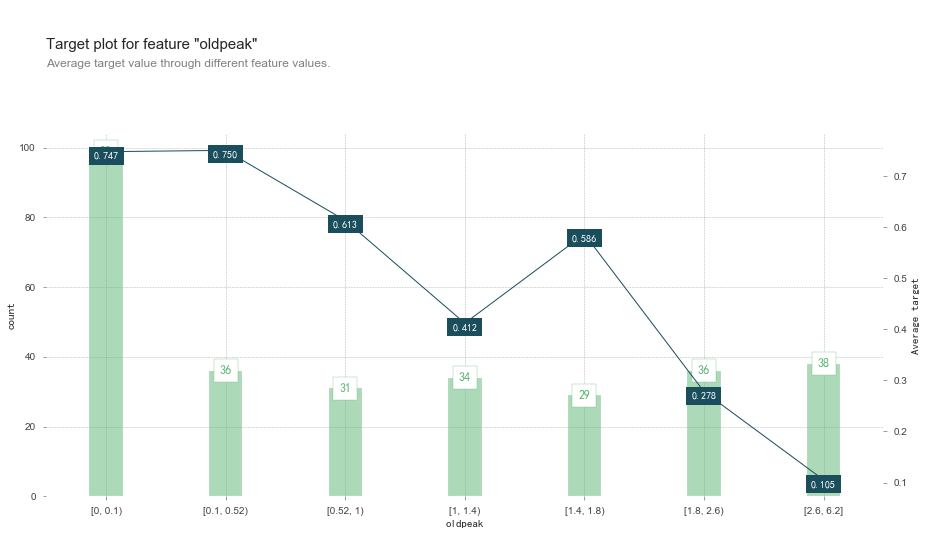

In [172]:
##先验概率统计
fig,axes,summary_df=info_plots.target_plot(df=df,feature='oldpeak',feature_name='oldpeak',target=['target'])

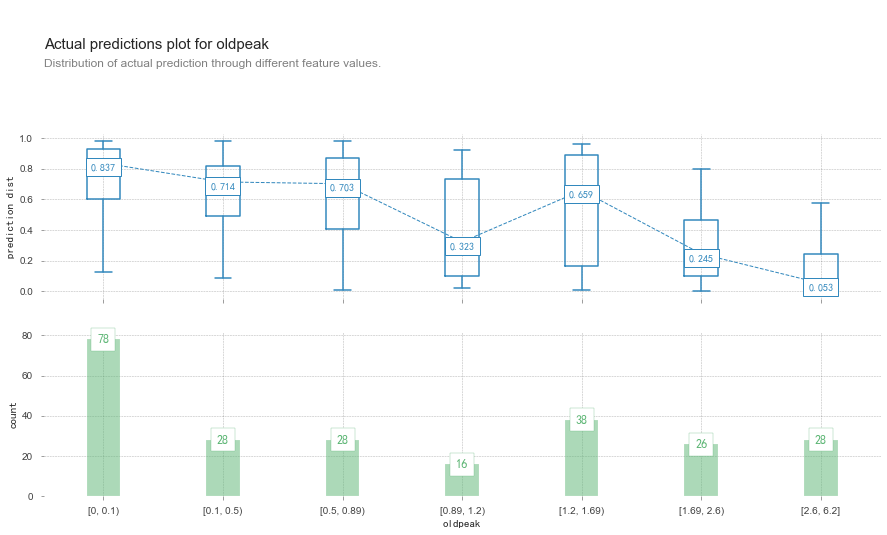

In [173]:
fig,axes,summary_df=info_plots.actual_plot(model=model4,X=train_X,feature='oldpeak',feature_name='oldpeak',predict_kwds={})
#模型预测相对于休息的运动引起的st值在1.8-6.2这个区间的患病概率是比较低的

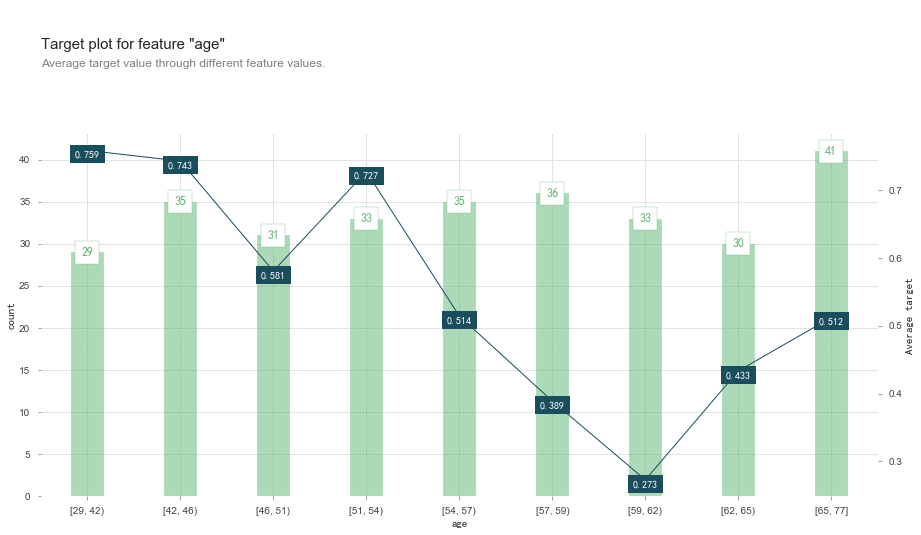

In [189]:
##先验概率统计
fig,axes,summary_df=info_plots.target_plot(df=df,feature='age',feature_name='age',target=['target'])

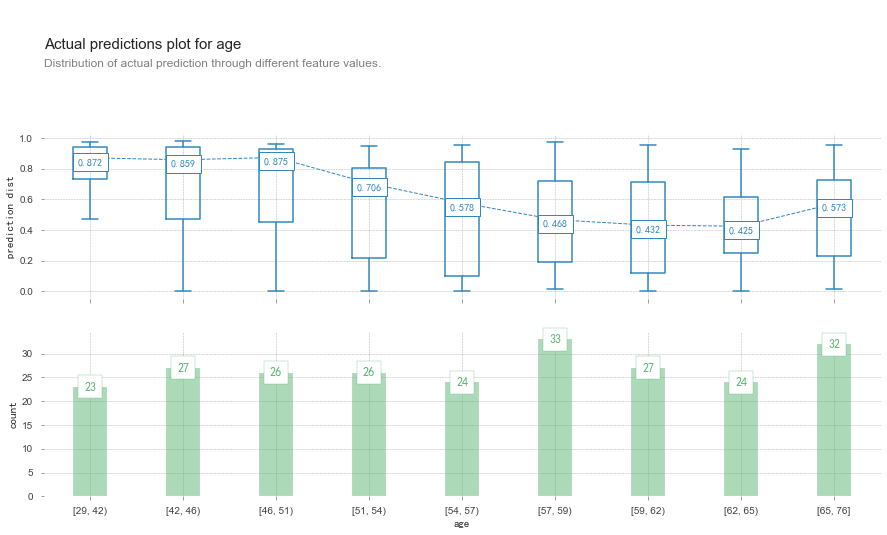

In [190]:
fig,axes,summary_df=info_plots.actual_plot(model=model4,X=train_X,feature='age',feature_name='age',predict_kwds={})